# Handwriting Recognition

In [1]:
import numpy as np
import pandas as pd
import os
import random 
import cv2
import keras
import random
import matplotlib.pyplot as plt
import seaborn as sns
import shutil
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils
from keras.models import Sequential, load_model
from keras import optimizers, callbacks
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

## Load dataset and create train and test sets
---

runtime = 20 mins

In [2]:
dir = "../input/handwritten-characters/Train/"
wahhh = []
train_data = []
img_size = 32
non_chars = ["#","$","&","@"]
digits = [str(i) for i in range(1,10)]
alpha_count = 0
for i in os.listdir(dir):
    if i in non_chars or i in digits:
        continue
    wahhh.append(i)
    alpha_count += 1
    print(alpha_count, "/26")
    count = 0
    sub_directory = os.path.join(dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 4000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        train_data.append([img,i])
    
random.shuffle(train_data)

train_X = []
train_Y = []
for features,label in train_data:
    train_X.append(features)
    train_Y.append(label)

train_X = np.array(train_X)/255.0 # normalisation, shape = (140000, 35, 35)
train_X = train_X.reshape(-1,32,32,1) # shape = (140000, 35, 35, 1)

LB = LabelBinarizer()
train_Y = LB.fit_transform(train_Y)
train_Y = np.array(train_Y)

1 /26
2 /26
3 /26
4 /26
5 /26
6 /26
7 /26
8 /26
9 /26
10 /26
11 /26
12 /26
13 /26
14 /26
15 /26
16 /26
17 /26
18 /26
19 /26
20 /26
21 /26
22 /26
23 /26
24 /26
25 /26
26 /26


runtime = 2 mins

In [3]:
val_dir = "../input/handwritten-characters/Validation/"
val_data = []
img_size = 32
alpha_count = 0
for i in os.listdir(val_dir):
    if i in non_chars or i in digits:
        continue
    alpha_count += 1
    print(alpha_count, "/35")
    count = 0
    sub_directory = os.path.join(val_dir,i)
    print(len(os.listdir(sub_directory)))
    for j in os.listdir(sub_directory):
        count+=1
        if count > 1000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        val_data.append([img,i])

random.shuffle(val_data)

val_X = []
val_Y = []
for features,label in val_data:
    val_X.append(features)
    val_Y.append(label)
    
val_X = np.array(val_X)/255.0
val_X = val_X.reshape(-1,32,32,1)

val_Y = LB.fit_transform(val_Y)
val_Y = np.array(val_Y)

1 /35
235
2 /35
366
3 /35
385
4 /35
381
5 /35
324
6 /35
343
7 /35
308
8 /35
210
9 /35
251
10 /35
119
11 /35
368
12 /35
240
13 /35
405
14 /35
189
15 /35
168
16 /35
363
17 /35
392
18 /35
384
19 /35
224
20 /35
181
21 /35
168
22 /35
175
23 /35
210
24 /35
182
25 /35
322
26 /35
126


In [4]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(alpha_count, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0

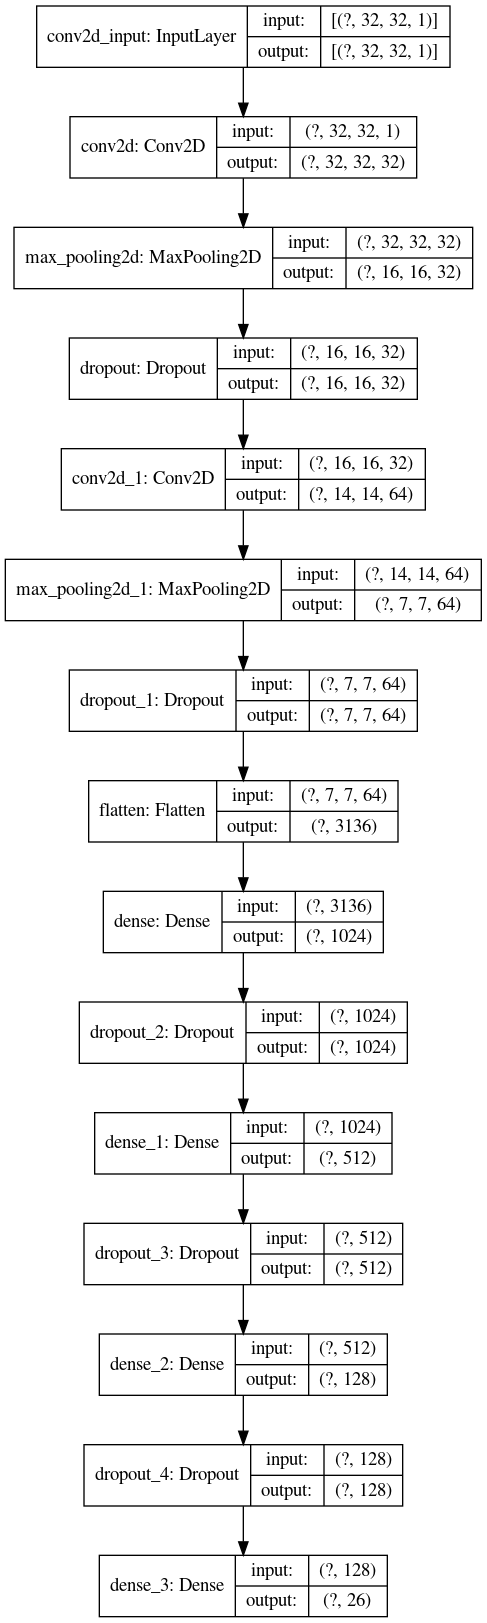

In [7]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [8]:
callback = callbacks.EarlyStopping(monitor='loss', patience=3)
history = model.fit(train_X,train_Y, epochs=20, batch_size=256, validation_data = (val_X, val_Y),  verbose=1)

Epoch 1/20
407/407 [==============================] - 116s 286ms/step - loss: 0.6828 - accuracy: 0.7877 - val_loss: 0.3436 - val_accuracy: 0.8899
Epoch 2/20
407/407 [==============================] - 116s 286ms/step - loss: 0.2843 - accuracy: 0.9084 - val_loss: 0.2677 - val_accuracy: 0.9095
Epoch 3/20
407/407 [==============================] - 116s 284ms/step - loss: 0.2308 - accuracy: 0.9241 - val_loss: 0.2298 - val_accuracy: 0.9234
Epoch 4/20
407/407 [==============================] - 113s 278ms/step - loss: 0.2064 - accuracy: 0.9310 - val_loss: 0.2360 - val_accuracy: 0.9152
Epoch 5/20
407/407 [==============================] - 116s 285ms/step - loss: 0.1840 - accuracy: 0.9379 - val_loss: 0.2099 - val_accuracy: 0.9273
Epoch 6/20
407/407 [==============================] - 115s 283ms/step - loss: 0.1689 - accuracy: 0.9422 - val_loss: 0.2274 - val_accuracy: 0.9275
Epoch 7/20
407/407 [==============================] - 115s 283ms/step - loss: 0.1580 - accuracy: 0.9455 - val_loss: 0.2278 -

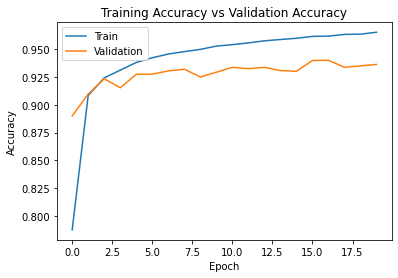

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

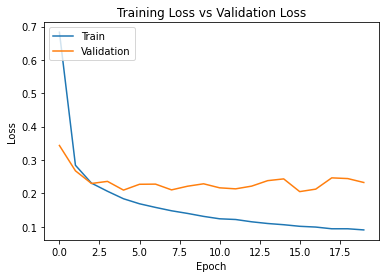

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()